In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import spacy

nlp = spacy.load("en_core_web_lg")

In [35]:
df = pd.read_csv('/Users/sheetals/Downloads/twitter_toxic_tweets_classification/data/twitter_toxic_tweets.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [36]:
df.shape

(31962, 3)

In [37]:
df.label.value_counts()

label
0    29720
1     2242
Name: count, dtype: int64

In [38]:
def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        else:
            filtered_tokens.append(token.lemma_)
    return ' '.join(filtered_tokens)

In [39]:
df['preprocessed_text'] = df['tweet'].apply(preprocess)
df.sample(5)

,id,label,tweet,preprocessed_text
12939,12940,0,tampa trump suppoers sing 'happy bihday' to ...,tampa trump suppoer sing happy bihday presu...
23369,23370,0,i finally found a way how to delete old tweets...,finally find way delete old tweet find useful ...
29601,29602,0,game day!!!! #gawa #daretodream @user,game day gawa daretodream @user
22351,22352,1,#preorder your copy of hot new #dystopian swif...,preorder copy hot new dystopian swiftly sharpe...
26559,26560,0,"a year ago to the day, i was having a blast in...",year ago day have blast orlando friend @user @...


In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    df.preprocessed_text,
    df.label,
    test_size=0.2,
     stratify=df.label
)

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

clf = Pipeline([
    ('vect', CountVectorizer()),
    ('nb', MultinomialNB())
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      5945
           1       0.86      0.50      0.63       448

    accuracy                           0.96      6393
   macro avg       0.91      0.74      0.80      6393
weighted avg       0.96      0.96      0.95      6393



In [42]:
clf = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1, 2))),
    ('nb', MultinomialNB())
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5945
           1       0.97      0.44      0.61       448

    accuracy                           0.96      6393
   macro avg       0.97      0.72      0.79      6393
weighted avg       0.96      0.96      0.95      6393



In [43]:
clf = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1, 3))),
    ('nb', MultinomialNB())
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5945
           1       0.98      0.43      0.60       448

    accuracy                           0.96      6393
   macro avg       0.97      0.71      0.79      6393
weighted avg       0.96      0.96      0.95      6393



In [44]:
clf = Pipeline([
    ('tf-idf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5945
           1       1.00      0.16      0.28       448

    accuracy                           0.94      6393
   macro avg       0.97      0.58      0.62      6393
weighted avg       0.94      0.94      0.92      6393



In [45]:
from sklearn.ensemble import RandomForestClassifier
clf = Pipeline([
    ('vc', CountVectorizer()),
    ('rf', RandomForestClassifier())
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5945
           1       0.91      0.48      0.62       448

    accuracy                           0.96      6393
   macro avg       0.94      0.74      0.80      6393
weighted avg       0.96      0.96      0.95      6393



In [46]:
clf = Pipeline([
    ('vc', CountVectorizer(ngram_range=(2, 3))),
    ('rf', RandomForestClassifier())
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      5945
           1       0.97      0.35      0.52       448

    accuracy                           0.95      6393
   macro avg       0.96      0.68      0.75      6393
weighted avg       0.95      0.95      0.94      6393



In [47]:
df['vector'] = df['preprocessed_text'].apply(lambda x: nlp(x).vector)
df.head()

,id,label,tweet,preprocessed_text,vector
0,1,0,@user when a father is dysfunctional and is s...,@user father dysfunctional selfish drag kid ...,"[-0.09681, -0.026814505, -0.0826533, 0.0714561..."
1,2,0,@user @user thanks for #lyft credit i can't us...,@user @user thank lyft credit use cause offer ...,"[0.02039971, 0.05957157, -0.13280888, -0.07972..."
2,3,0,bihday your majesty,bihday majesty,"[0.10751333, 0.059713334, 0.041806668, -0.1915..."
3,4,0,#model i love u take with u all the time in ...,model love u u time urð± ðððð ...,"[-0.0073165027, 0.04401362, -0.022644807, -0.0..."
4,5,0,factsguide: society now #motivation,factsguide society motivation,"[-0.139526, 0.20825401, 0.061390005, -0.029199..."


In [48]:
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(
    df.vector.values,
    df.label,
    test_size=0.2,
    stratify=df.label
)

In [61]:
df.label.value_counts()

label
0    29720
1     2242
Name: count, dtype: int64

In [68]:
from sklearn.svm import LinearSVC


clf = Pipeline([
    ('tfidf', TfidfVectorizer(
        max_features=40000,
        ngram_range=(1,2),
        min_df=3,
        sublinear_tf=True
    )),
    ('svm', LinearSVC(
        class_weight='balanced',
        C=1.0
    ))
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(
    y_test,
    y_pred,
    target_names=['non-toxic', 'toxic']
))


              precision    recall  f1-score   support

   non-toxic       0.98      0.97      0.97      5945
       toxic       0.61      0.71      0.66       448

    accuracy                           0.95      6393
   macro avg       0.79      0.84      0.81      6393
weighted avg       0.95      0.95      0.95      6393



In [ ]:
scores = clf.decision_function(X_test)

In [65]:
from sklearn.metrics import precision_recall_curve
import numpy as np

precision, recall, thresholds = precision_recall_curve(y_test, scores)

# Example: maximize F1
f1 = 2 * precision * recall / (precision + recall + 1e-9)
best_idx = np.argmax(f1)

best_threshold = thresholds[best_idx]
precision[best_idx], recall[best_idx], f1[best_idx], best_threshold


(np.float64(0.8580645161290322),
 np.float64(0.59375),
 np.float64(0.7018469652157809),
 np.float64(0.5350128200773953))

In [66]:
for C in [0.1, 0.5, 1, 2]:
    clf = Pipeline([
        ('tfidf', TfidfVectorizer(
            max_features=40000,
            ngram_range=(1,2),
            min_df=3,
            sublinear_tf=True
        )),
        ('svm', LinearSVC(class_weight='balanced', C=C))
    ])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(C, classification_report(y_test, y_pred, output_dict=True)['1']['f1-score'])


0.1 0.6263537906137184
0.5 0.6505538771399798
1 0.6577319587628866
2 0.6687763713080169


In [67]:
feature_names = clf.named_steps['tfidf'].get_feature_names_out()
coef = clf.named_steps['svm'].coef_[0]

top_pos = np.argsort(coef)[-20:]
top_neg = np.argsort(coef)[:20]

print("Top toxic indicators:")
print(feature_names[top_pos])

print("\nTop non-toxic indicators:")
print(feature_names[top_neg])


Top toxic indicators:
['woman' 'nigger' 'misogyny' 'isn' 'boycott' 'jews' 'horrible attack'
 'misogynist' '2017' 'fascist' 'equality' 'bigot' 'paladino' 'oiler'
 'brother user' 'discrimination' 'racism' 'white' 'allahsoil'
 'blacklivesmatter']

Top non-toxic indicators:
['orlando' 'ali' 'bihday' 'day' 'gun' 'amazing' 'sex blonde' 'tomorrow'
 'fully' 'tired' 'summer' 'accept' 'cunt' 'google' 'break' 'hardcore'
 'euro2016' 'weak' 'fathersday' 'example']


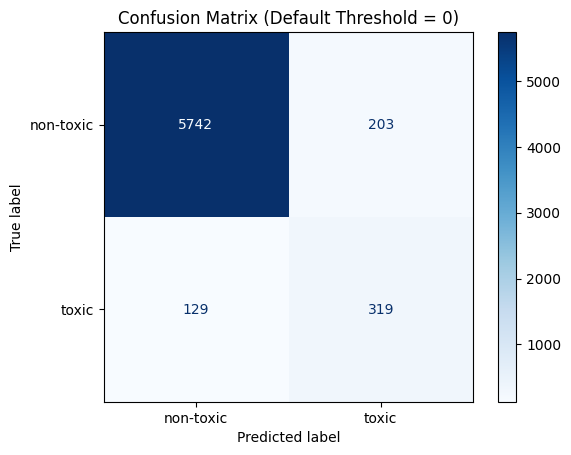

In [69]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['non-toxic', 'toxic']
)

disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (Default Threshold = 0)")
plt.show()


In [70]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f"FN rate (missed toxic): {fn / (fn + tp):.2f}")
print(f"FP rate (false alarm): {fp / (fp + tn):.2f}")

FN rate (missed toxic): 0.29
FP rate (false alarm): 0.03


In [72]:
import joblib

joblib.dump(clf, "/Users/sheetals/Downloads/twitter_toxic_tweets_classification/toxic_svm_pipeline.joblib")


['/Users/sheetals/Downloads/twitter_toxic_tweets_classification/toxic_svm_pipeline.joblib']